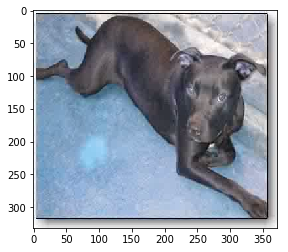

In [1]:
#DataSet : https://www.kaggle.com/thesherpafromalabama/cats-and-dogs-sentdex-tutorial
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

data_dir = '/content/PetImages' #Path for directory with training data.
categories = ['Dog', 'Cat']
for category in categories:
    path = os.path.join(data_dir, category) #Path for either Cat images or Dog Images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #Converting image to array
        plt.imshow(img_array)
        plt.show()
        break
    break


In [2]:
print('Dimensions : ' + str(img_array.shape) + '\n\n\n' ) #Shape or Dimensions of an image
print(img_array) #Representation of image as array

Dimensions : (332, 373, 3)



[[[248 254 255]
  [247 253 255]
  [248 254 255]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[233 239 246]
  [245 251 255]
  [248 254 255]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[248 254 255]
  [208 214 221]
  [248 254 255]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]]


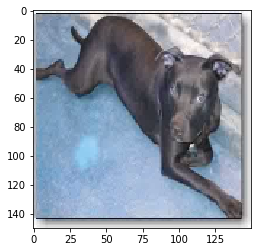

In [3]:
img_size = 150
new_img_arr = cv2.resize(img_array, (img_size, img_size)) #Resizing image to get a constant shape throughout the dataset.
plt.imshow(new_img_arr)

In [0]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category) #Path for either Cat images or Dog Images
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img)) #Converting image to array
                new_img_arr = cv2.resize(img_array, (img_size, img_size)) #Resizing all the images
                training_data.append([new_img_arr, class_num])
            except Exception as e:
                pass

create_training_data()

In [5]:
print(len(training_data)) #Totoal images to train

24946


In [0]:
import random

random.shuffle(training_data) #Shuffling the images

In [0]:
images = []
labels = []

In [0]:
for features,label in training_data:
    images.append(features) #Separating images and labels into two different lists
    labels.append(label)
images = np.array(images).reshape(-1, img_size, img_size, 3)

In [0]:
import pickle

#Saving the processed images and labels list into files
pickle_out = open('cats_dogs_features', 'wb')
pickle.dump(images,pickle_out)
pickle_out.close()
pickle_out = open('cats_dogs_labels', 'wb')
pickle.dump(labels,pickle_out)
pickle_out.close()

#These can be loaded if needed!
#images = pickle.load(open("/content/giiit/cats_dogs_features", 'rb'))
#labels = pickle.load(open("/content/giiit/cats_dogs_labels", 'rb'))

In [13]:
#Building our model
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#Training our model
history = model.fit(images,labels,batch_size=32, epochs = 20, validation_split = 0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/20
22451/22451 [==============================] - 52s 2ms/sample - loss: 1.1475 - acc: 0.5561 - val_loss: 0.6293 - val_acc: 0.6224
Epoch 2/20
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.6368 - acc: 0.6218 - val_loss: 0.6229 - val_acc: 0.6561
Epoch 3/20
22451/22451 [==============================] - 52s 2ms/sample - loss: 0.6003 - acc: 0.6706 - val_loss: 0.5711 - val_acc: 0.6770
Epoch 4/20
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.5699 - acc: 0.6988 - val_loss: 0.4981 - val_acc: 0.7623
Epoch 5/20
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.5026 - acc: 0.7557 - val_loss: 0.4611 - val_acc: 0.7711
Epoch 6/20
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.4392 - acc: 0.7967 - val_loss: 0.3815 - val_acc: 0.8309
Epoch 7/20
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.3687 - acc: 0.8348 - val_loss: 0.3

In [0]:
#Saving the trained model!
model.save('Cats_Dogs_classifier.h5')

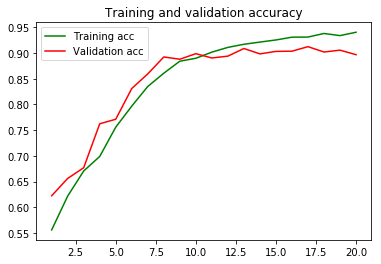

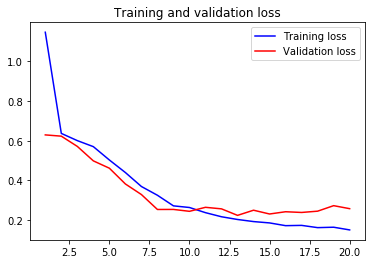

In [16]:
#plotting accuracy, loss , validation accuracy and validation loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history ['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
